# Financial Data Analysis
About: This is a module from Python A-Z™: Python For Data Science With Real Exercises! available at udemy.com
       The code here is expressed based on my own interpretation of the lessons and guidance of the instructor.

Copyright: These datasets were prepared using publicly available data. However, theses scripts are subject to Copyright Laws.

Reference: Eremenko, 2018

Retrieved: www.udemy.com

Comments:

Scenario:You are a Data Scientist working for a consulting firm. One of your colleagues from the Auditing department has asked you to help them assess the financial statement of organisation X.

You have been supplied with two vectors of data: monthly revenue and monthly expenses for the financial year in question.Your task is to calculate the following financial metrics:

- profit for each month
- profit after tax for each month (the tax rate is 30%)
- profit margin for each month - equals to profit after tax divided by revenue
- good months - where the profit after tax was greater than the mean for the year - bad months - where the profit after tax was less than the mean for the year
- the best month - where the profit after tax was max for the year
- the worst month - where the profit after tax was min for the year

---

### Financial Data Analyis and Visualisation

In [119]:
#Data 
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] # included dates to map figures to acutal months
revenue = [14574.49, 7606.46, 8611.41, 9175.41, 8058.65, 8105.44, 11496.28, 9766.09, 10305.32, 14379.96, 10713.97, 15433.50]
expenses = [12051.82, 5695.07, 12319.20, 12089.72, 8658.57, 840.20, 3285.73, 5821.12, 6976.93, 16618.61, 10054.37, 3803.96]

In [120]:
import numpy as np
import pandas as pd

#### Data Preparation

In [121]:
# create array for months
mo = np.array(months)

In [122]:
#  create array for revenue
r = np.array(revenue)

In [123]:
# create array for expenses
e = np.array(expenses)

#### Data Transformation

In [124]:
# Profit
p = np.array(np.subtract(r,e))

In [125]:
# Monthly Profit after tax 30% using list comprehension
#mp = [profit - (profit * 0.3) for profit in profit]
mp = np.array([p - (p * 0.3) for p in p])

In [126]:
# Profit Margin 
# monthly profit / revenue
pm = np.array([np.around(mp/r,2) * 100])

In [127]:
# Good Months
# m (mean), gm= good months
m = np.mean(mp)

In [128]:
gm = [gm > m for gm in mp]

In [129]:
# Bad Months
# bm = bad months
bm = [bm < m for bm in mp]

In [130]:
# Best Month
# bmmax = best month maximum
# bestm = best month
bmmax = max(mp)
bestm = [mp == bmmax for i in mp]

In [131]:
# Worst Month
# wmmin = worst month minimum
# worstm = worst month
wmmin = min(mp)
worstm = [mp == wmmin for wmmin in mp]

In [132]:
# Convert calculations to thousand dollars
#pd.set_option('Precision',0)
r1000 = [np.around(r/1000, decimals=2) for r in r]
e1000 = [np.round(e/1000,2) for e in e]
p1000 = [np.around(p/1000, decimals=2) for p in p]
mp1000 = [np.around(mp, decimals=2) for mp in mp]

In [133]:
r1000 = [np.int(r) for r in r]
e1000 = [np.int(e) for e in e]
p1000 = [np.int(p) for p in p]
mp1000 = [np.int(mp) for mp in mp]

#### Results

In [134]:
# Print Results
print ("Revenue:") 
print (r1000)
print ("Expenses:") 
print (e1000)
print ("Profit:")
print(p1000)
print ("Profit after tax:")
print (mp1000)
print ("Profit margin:")
print (pm)
print ("Good months:")
print (gm)
print ("Bad months:")
print (bm)
print ("Best month:")
print(bestm[0])
print ("Worst month:")
print (worstm[0])

Revenue:
[14574, 7606, 8611, 9175, 8058, 8105, 11496, 9766, 10305, 14379, 10713, 15433]
Expenses:
[12051, 5695, 12319, 12089, 8658, 840, 3285, 5821, 6976, 16618, 10054, 3803]
Profit:
[2522, 1911, -3707, -2914, -599, 7265, 8210, 3944, 3328, -2238, 659, 11629]
Profit after tax:
[1765, 1337, -2595, -2040, -419, 5085, 5747, 2761, 2329, -1567, 461, 8140]
Profit margin:
[[ 12.  18. -30. -22.  -5.  63.  50.  28.  23. -11.   4.  53.]]
Good months:
[True, False, False, False, False, True, True, True, True, False, False, True]
Bad months:
[False, True, True, True, True, False, False, False, False, True, True, False]
Best month:
[False False False False False False False False False False False  True]
Worst month:
[ True False False False False False False False False False False False]


---

### Exploratory Data Analyses (EDA)

Objective: 

Simulate a dataframe build from the vectors created for months, revenues, and expenses

Dump the dataframe to a csv file as the data type (object) resulting from the dataframe can not induce operations

Create visualisations via seaborn package

In [135]:
# Step 1: to build dataframe, Merge Months(m), Revenue(r), Expenses(e), Profit(p), MonthlyProfit(mp)
#d = np.concatenate((m,r,e,p,mp))
d = np.concatenate((mo,r1000,e1000,p1000,mp1000))

In [136]:
# Step 2: to build dataframe, Create two-dimensional matrix for m,r,e,p,mp
# 12 x 5 dimension, order=Fortran (Verticaly populated)
re = np.reshape(d, (12,5), order='F')

In [140]:
# Step 3: Construct the dataframe and dump to csv
import os
print(os.getcwd())
fda = (pd.DataFrame(re, columns=['Months','Revenue', 'Expenses', 'ProfitAfterTax', 'MonthlyProfit']))
#fda.to_csv('/Users/rmph/Desktop/Projects - current/udemy/sds/Python/Section3/fda.csv')

/Users/rmph/Desktop/Projects - current/udemy/sds/Python/Section3


In [138]:
# Step 4: load dataset and check the data types
fda = pd.read_csv('fda.csv')
fda.dtypes

Months            int64
Revenue           int64
Expenses          int64
ProfitAfterTax    int64
MonthlyProfit     int64
dtype: object

In [139]:
# check dataframe
fda

,Months,Revenue,Expenses,ProfitAfterTax,MonthlyProfit
0,1,14574,12051,2522,1765
1,2,7606,5695,1911,1337
2,3,8611,12319,-3707,-2595
3,4,9175,12089,-2914,-2040
4,5,8058,8658,-599,-419
5,6,8105,840,7265,5085
6,7,11496,3285,8210,5747
7,8,9766,5821,3944,2761
8,9,10305,6976,3328,2329
9,10,14379,16618,-2238,-1567


In [59]:
# import calendar
# map the months from calendar to actual values in the months column
fda.Months = fda['Months'].apply(lambda x: calendar.month_abbr[x])
fda

,Months,Revenue,Expenses,ProfitAfterTax,MonthlyProfit
0,Jan,14574,12051,2522,1765
1,Feb,7606,5695,1911,1337
2,Mar,8611,12319,-3707,-2595
3,Apr,9175,12089,-2914,-2040
4,May,8058,8658,-599,-419
5,Jun,8105,840,7265,5085
6,Jul,11496,3285,8210,5747
7,Aug,9766,5821,3944,2761
8,Sep,10305,6976,3328,2329
9,Oct,14379,16618,-2238,-1567


In [147]:
# Prepare the packages for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=8,4
import warnings
warnings.filterwarnings('ignore')

#### Visualise Distributions for all the Variables

MonthlyProfit is Gaussian Distribution

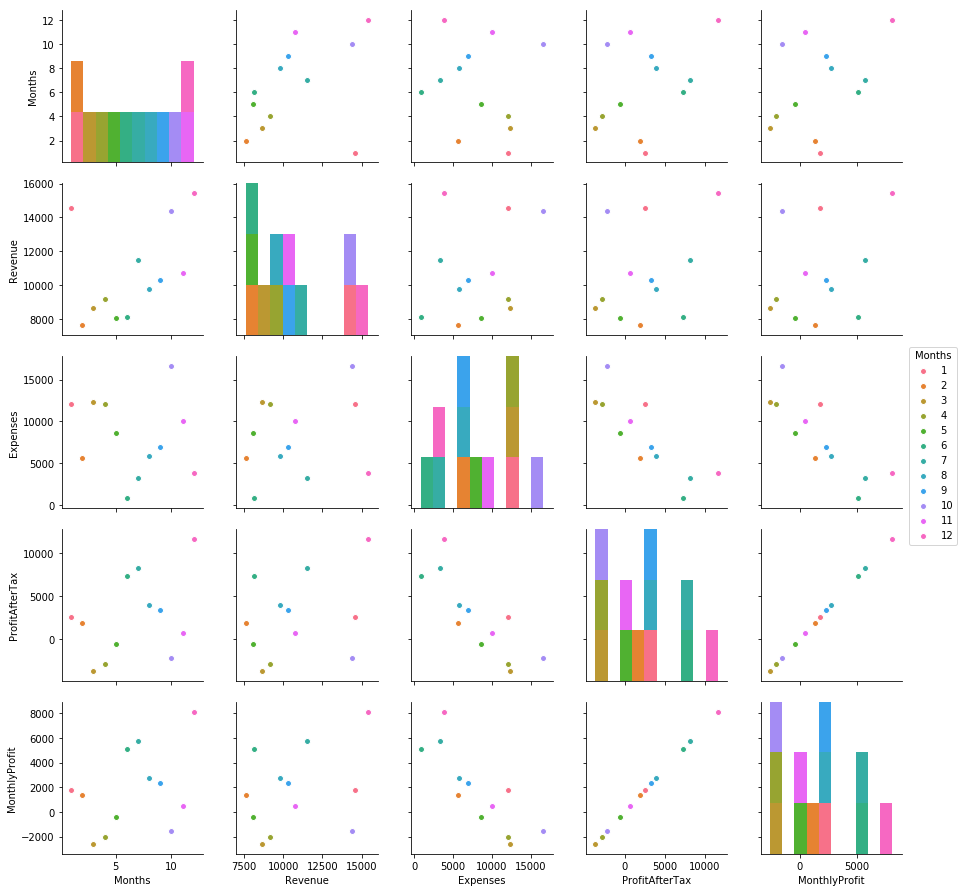

In [146]:
mpviz = sns.pairplot(fda, hue='Months')

#### Monthly Profit

Normal distribution for Monthly Profit

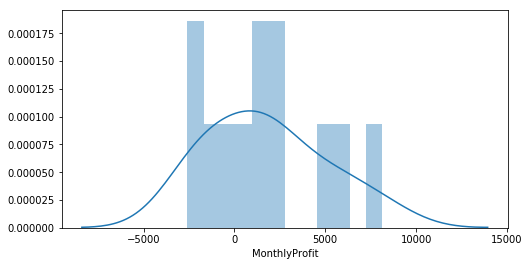

In [145]:
mpviz = sns.distplot(fda["MonthlyProfit"], bins=12)

#### Monthly Profit After Taxes
Profit After Tax is skewed to the left

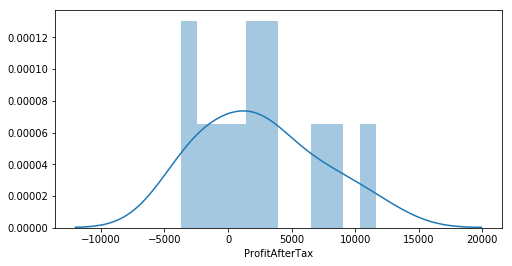

In [144]:
patviz = sns.distplot(fda["ProfitAfterTax"], bins=12)

#### Profit after tax over a year period

Highest Profit After Tax achieved is on December at 11629 which is the Fiscal Year End.

While the March has the highest deferred profit at -3707.

lowest earnings were recorded for November and May respectively.

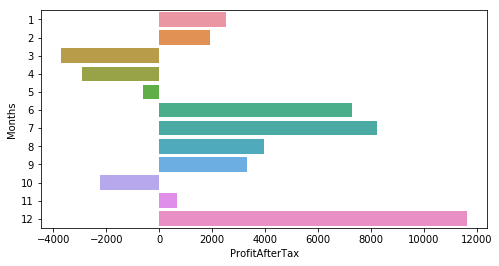

In [143]:
patviz1 = sns.barplot(data=fda, x='ProfitAfterTax', y='Months', orient='h')